### Minimum Domino Rotations For Equal Row

In a row of dominoes, A[i] and B[i] represent the top and bottom halves of the i-th domino.  (A domino is a tile with two numbers from 1 to 6 - one on each half of the tile.)

We may rotate the i-th domino, so that A[i] and B[i] swap values.

Return the minimum number of rotations so that all the values in A are the same, or all the values in B are the same.

If it cannot be done, return -1.
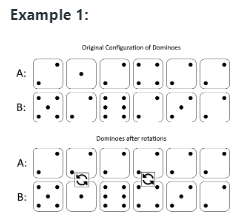

##### Example1
Input: A = [2,1,2,4,2,2], B = [5,2,6,2,3,2]
Output: 2

Explanation: 
The first figure represents the dominoes as given by A and B: before we do any rotations.

If we rotate the second and fourth dominoes, we can make every value in the top row equal to 2, as indicated by the second figure.

##### Example2

Input: A = [3,5,1,2,3], B = [3,6,3,3,4]  Output: -1

Explanation: 
In this case, it is not possible to rotate the dominoes to make one row of values equal.

Note:

1 <= A[i], B[i] <= 6

2 <= A.length == B.length <= 20000

#### My Solution, brings same output as Omar's but not passing on Leetcode


In [17]:
from collections import Counter
def minDominoRotations(A, B):
    a=A
    b=B
    common=Counter(a).most_common(1)[0][0] #counts all occurrences for each number and returns the one that has more occurrences
    #print(Counter(a).most_common)
    rotations=0
    for i,value in enumerate(a):
        if value==common:
            pass
        else:
            if b[i]==common:
                rotations+=1
    if (Counter(a).most_common(1)[0][1]+rotations) == len(a):
        return rotations
    else: #do the same with b list
        rotations=0
        common=Counter(b).most_common(1)[0][0] #counts all occurrences for each number and returns the one that has more occurrences
        rotations=0
        for i,value in enumerate(b):
            if value==common:
                pass
            else:
                if a[i]==common:
                    rotations+=1
        if (Counter(b).most_common(1)[0][1]+rotations) == len(b):
            return rotations
        else:
            return -1
minDominoRotations([2,1,1,1,2,2,2,1,1,2],[1,1,2,1,1,1,1,2,1,1])

2

#### Omar's Solutions

In [18]:
from collections import defaultdict
def minDominoRotationsOmar(A, B):
    """
    :type A: List[int]
    :type B: List[int]
    :rtype: int
    """
    n = len(A)
    dicA = defaultdict(int)
    dicB = defaultdict(int)
    dup = defaultdict(int)

    #counting each number and registring the duplicates
    for i in range(n):
        dicA[A[i]] += 1
        dicB[B[i]] += 1
        if A[i] == B[i]:
            dup[A[i]] += 1

    # initializing the result
    res = float('inf')

    #looping through it
    for key,val in dicA.items():
        #if it is already flipped
        if val == n:
            return 0
        #the the count for that number in both dictionaries subtracted by the duplicates is more than or equal to n
        if val + dicB[key] - dup[key] == n:
            res = min(res,n - val,n - dicB[key])

    #if the value hasn't change it means it didn't go into the if statement meaning there is not at least one viable solution
    return res if res != float('inf') else -1
minDominoRotationsOmar([2,1,1,1,2,2,2,1,1,2],[1,1,2,1,1,1,1,2,1,1])

2

#### Leetcode
My method is to get the array with the number with the highest frequency first because it would be mean the minimum number of swaps. From there, we just iterate thorugh the chosen array to count the number of swaps or return -1 if there exists an A[i] and B[i] that is not equals to that number (not possible)

O(A+B) time --> because we iterate through both arrays at least once to count the frequency

O(1) space --> because our dictionary of freq has at most size 6

In [27]:
from collections import Counter
def minDominoRotations(A, B):
    a, countA = Counter(A).most_common(1)[0]
    b, countB = Counter(B).most_common(1)[0]
    
    #The next step avoids iterating boths arrays, 
    #because it determines which one has the highes frecuency of the main number,
    #and establishes that array as the only one to iterate
    n, arr1, arr2 = (a, A, B) if countA >= countB else (b, B, A)
    count = 0
    for i in range(len(arr1)):
        if arr1[i] != n:
            if arr2[i] == n:
                count += 1
            else:
                return -1
    return count